### Importation of Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import statsmodels.api as sm
# from statsmodels.api import Logit, add_constant



### Load Data

In [21]:
raw_data = pd.read_csv("Social_Network_Ads.csv")
data = raw_data.copy()
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [23]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
data.drop("User ID", axis=1, inplace=True)

In [27]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [29]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [30]:
# Features
X1 = data.drop("Purchased", axis=1)
y = data["Purchased"]

In [47]:
# Lin Reg Analysis
X = sm.add_constant(X1)
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.4711
Time:                        12:18:22   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Gender              0.3338      0.305      1.094      0.274      -0.264       0.932
Age                 0.2370      0.026      8.984      0.000       0.185       0.289
EstimatedSalary  3.644e-05   5.47e-06      6.659      0.000    2.57e-05    4.72e-05
===================================================================================
"""

In [68]:
model.predict(X).round(0)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    1.0
397    0.0
398    0.0
399    1.0
Length: 400, dtype: float64

In [69]:
data["Predicted"] = model.predict(X).round(0)
data

,Gender,Age,EstimatedSalary,Purchased,Predicted
0,1,19,19000,0,0.0
1,1,35,20000,0,0.0
2,0,26,43000,0,0.0
3,0,27,57000,0,0.0
4,1,19,76000,0,0.0
...,...,...,...,...,...
395,0,46,41000,1,0.0
396,1,51,23000,1,1.0
397,0,50,20000,1,0.0
398,1,36,33000,0,0.0


In [71]:
n = X.drop("Gender", axis=1)

In [73]:
n.head()

,const,Age,EstimatedSalary
0,1.0,19,19000
1,1.0,35,20000
2,1.0,26,43000
3,1.0,27,57000
4,1.0,19,76000


In [74]:
Xn = sm.add_constant(n)
model_n = sm.Logit(y, Xn).fit()
model_n.summary()

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.4688
Time:                        12:40:53   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4340      1.300     -9.566      0.000     -14.982      -9.886
Age                 0.2335      0.026      9.013      0.000       0.183       0.284
EstimatedSalary   3.59e-05   5.43e-06      6.613      0.000    2.53e-05    4.65e-05
===================================================================================
"""

In [77]:
data["Predicted_n"] = model_n.predict(Xn).round(0)
data

,Gender,Age,EstimatedSalary,Purchased,Predicted,Predicted_n
0,1,19,19000,0,0.0,0.0
1,1,35,20000,0,0.0,0.0
2,0,26,43000,0,0.0,0.0
3,0,27,57000,0,0.0,0.0
4,1,19,76000,0,0.0,0.0
...,...,...,...,...,...,...
395,0,46,41000,1,0.0,0.0
396,1,51,23000,1,1.0,1.0
397,0,50,20000,1,0.0,0.0
398,1,36,33000,0,0.0,0.0


### SK Learn with Splitted Data

In [160]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Optimization terminated successfully.
         Current function value: 0.342641
         Iterations 8
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.82      0.77      0.79        30

    accuracy                           0.85        80
   macro avg       0.84      0.83      0.84        80
weighted avg       0.85      0.85      0.85        80

Confusion Matrix:
[[45  5]
 [ 7 23]]


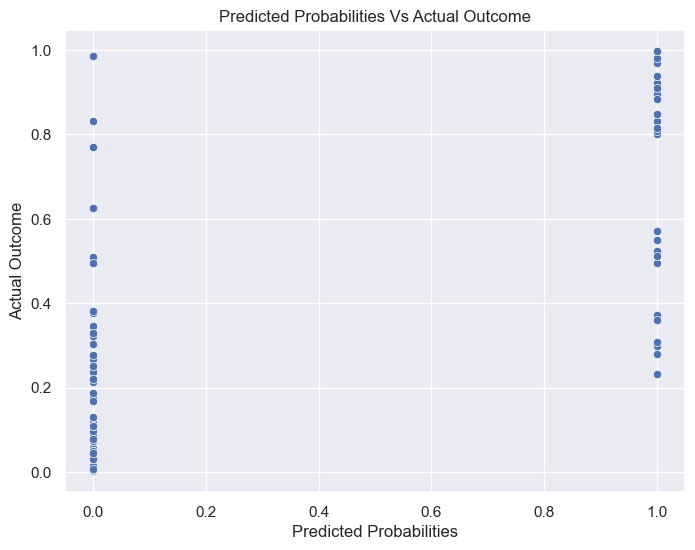

In [161]:
# Load the data
raw_data = pd.read_csv("Social_Network_Ads.csv")
data = raw_data.copy()

# Drop the ID column
data.drop("User ID", axis=1, inplace=True)

# Encode the catefgorical variables
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

# Split the dataset into traing and test set
X = data.drop("Purchased", axis=1)
y = data["Purchased"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Scale the variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Add a constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
model = sm.Logit(y_train, X_train).fit()
model.summary()

# Make predictions
y_pred = model.predict(X_test)
# y_pred
# Convert the prediction to binary
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Predicted Probabilities Vs Actual Outcome")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Outcome")
plt.show()

In [164]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
